<a href="https://colab.research.google.com/github/Pratibha65/Big_Mart_Sales_Prediction/blob/main/Big_Mart_Sales_Prediction_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [101]:
data = pd.read_csv("/content/Train.csv")

In [102]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
data.shape

(8523, 12)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [105]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [106]:
data.Item_Weight.mean()

12.857645184135976

In [107]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [160]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [109]:
data.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [110]:
mode = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc = (lambda x:x.mode()[0]))

In [111]:
print(mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [112]:
missing_values = data.Outlet_Size.isnull()

In [113]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [114]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode[x])

In [115]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [116]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [118]:
data.Item_Fat_Content.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [119]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

LABEL ENCODING : transform all categorical values into numerical values


In [120]:
encoder = LabelEncoder()

In [121]:
data.Item_Identifier = encoder.fit_transform(data.Item_Identifier)

In [122]:
data.Item_Fat_Content = encoder.fit_transform(data.Item_Fat_Content)

In [123]:
data.Item_Type = encoder.fit_transform(data.Item_Type)

In [124]:
data.Outlet_Identifier = encoder.fit_transform(data.Outlet_Identifier)

In [125]:
data.Outlet_Size = encoder.fit_transform(data.Outlet_Size)

In [126]:
data.Outlet_Type = encoder.fit_transform(data.Outlet_Type)

In [127]:
data.Outlet_Location_Type = encoder.fit_transform(data.Outlet_Location_Type)

In [128]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


In [129]:
X = data.drop(columns='Item_Outlet_Sales',axis=1)

In [130]:
Y=data.Item_Outlet_Sales

Regressor

In [131]:
regressor = XGBRegressor()

In [132]:
regressor.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [133]:
train_p = regressor.predict(X)
r2_train = metrics.r2_score(Y,train_p)
print(r2_train)

0.8550040956758185


In [161]:
test_data = pd.read_csv('/content/Test.csv')

In [162]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [163]:
test_data.Item_Weight.mean()

12.695633368756642

In [164]:
test_data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [165]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [166]:
t_mode = test_data.pivot_table(values = 'Outlet_Size',columns='Outlet_Type',aggfunc = (lambda y: y.mode()[0]))

In [167]:
print(t_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [171]:
miss_values = test_data.Outlet_Size.isnull()
print(miss_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [172]:
test_data.loc[miss_values,'Outlet_Size'] = test_data.loc[miss_values,'Outlet_Type'].apply(lambda y:mode[y])

In [173]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [175]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,9.30,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,5.92,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,17.50,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,19.20,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,8.93,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


<ipython-input-182-a9b4fd9b28ba>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['Item_Weight'])


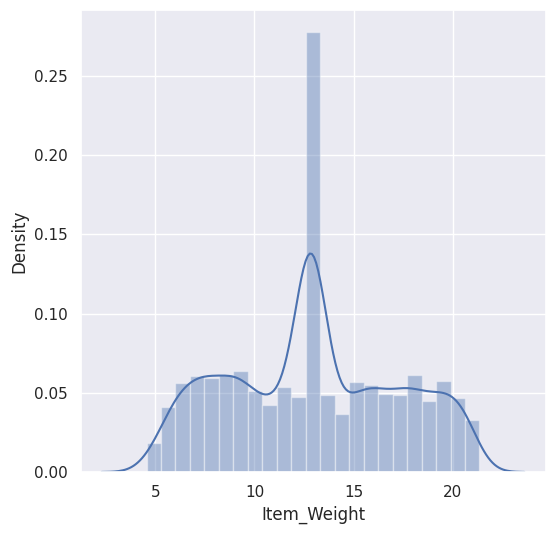

In [182]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(test_data['Item_Weight'])
plt.show()

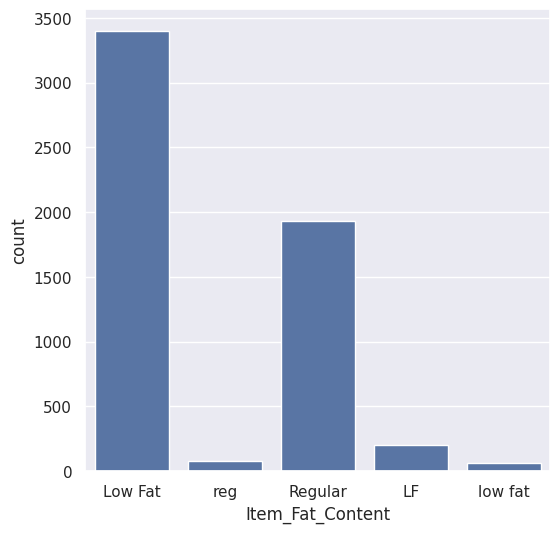

In [185]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=test_data)
plt.show()

In [186]:
test_data.replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

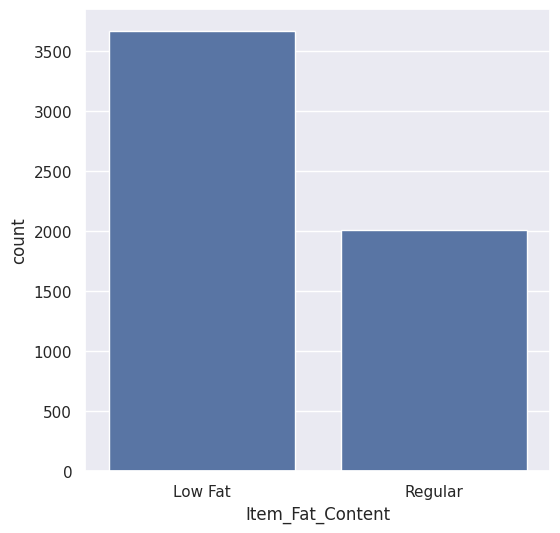

In [187]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=test_data)
plt.show()

<ipython-input-188-4cc2121c9c66>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['Item_Visibility'])


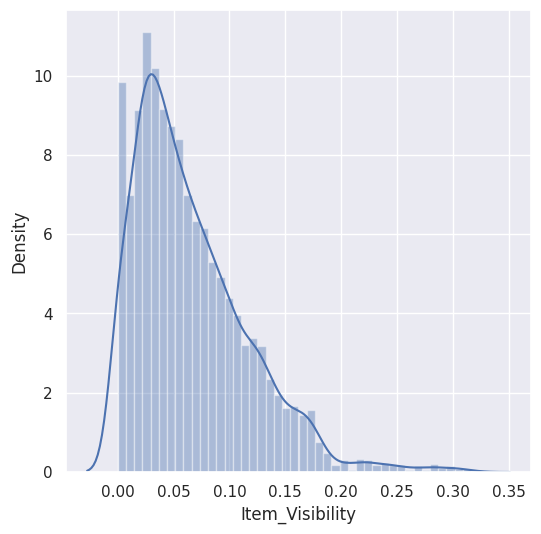

In [188]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(test_data['Item_Visibility'])
plt.show()

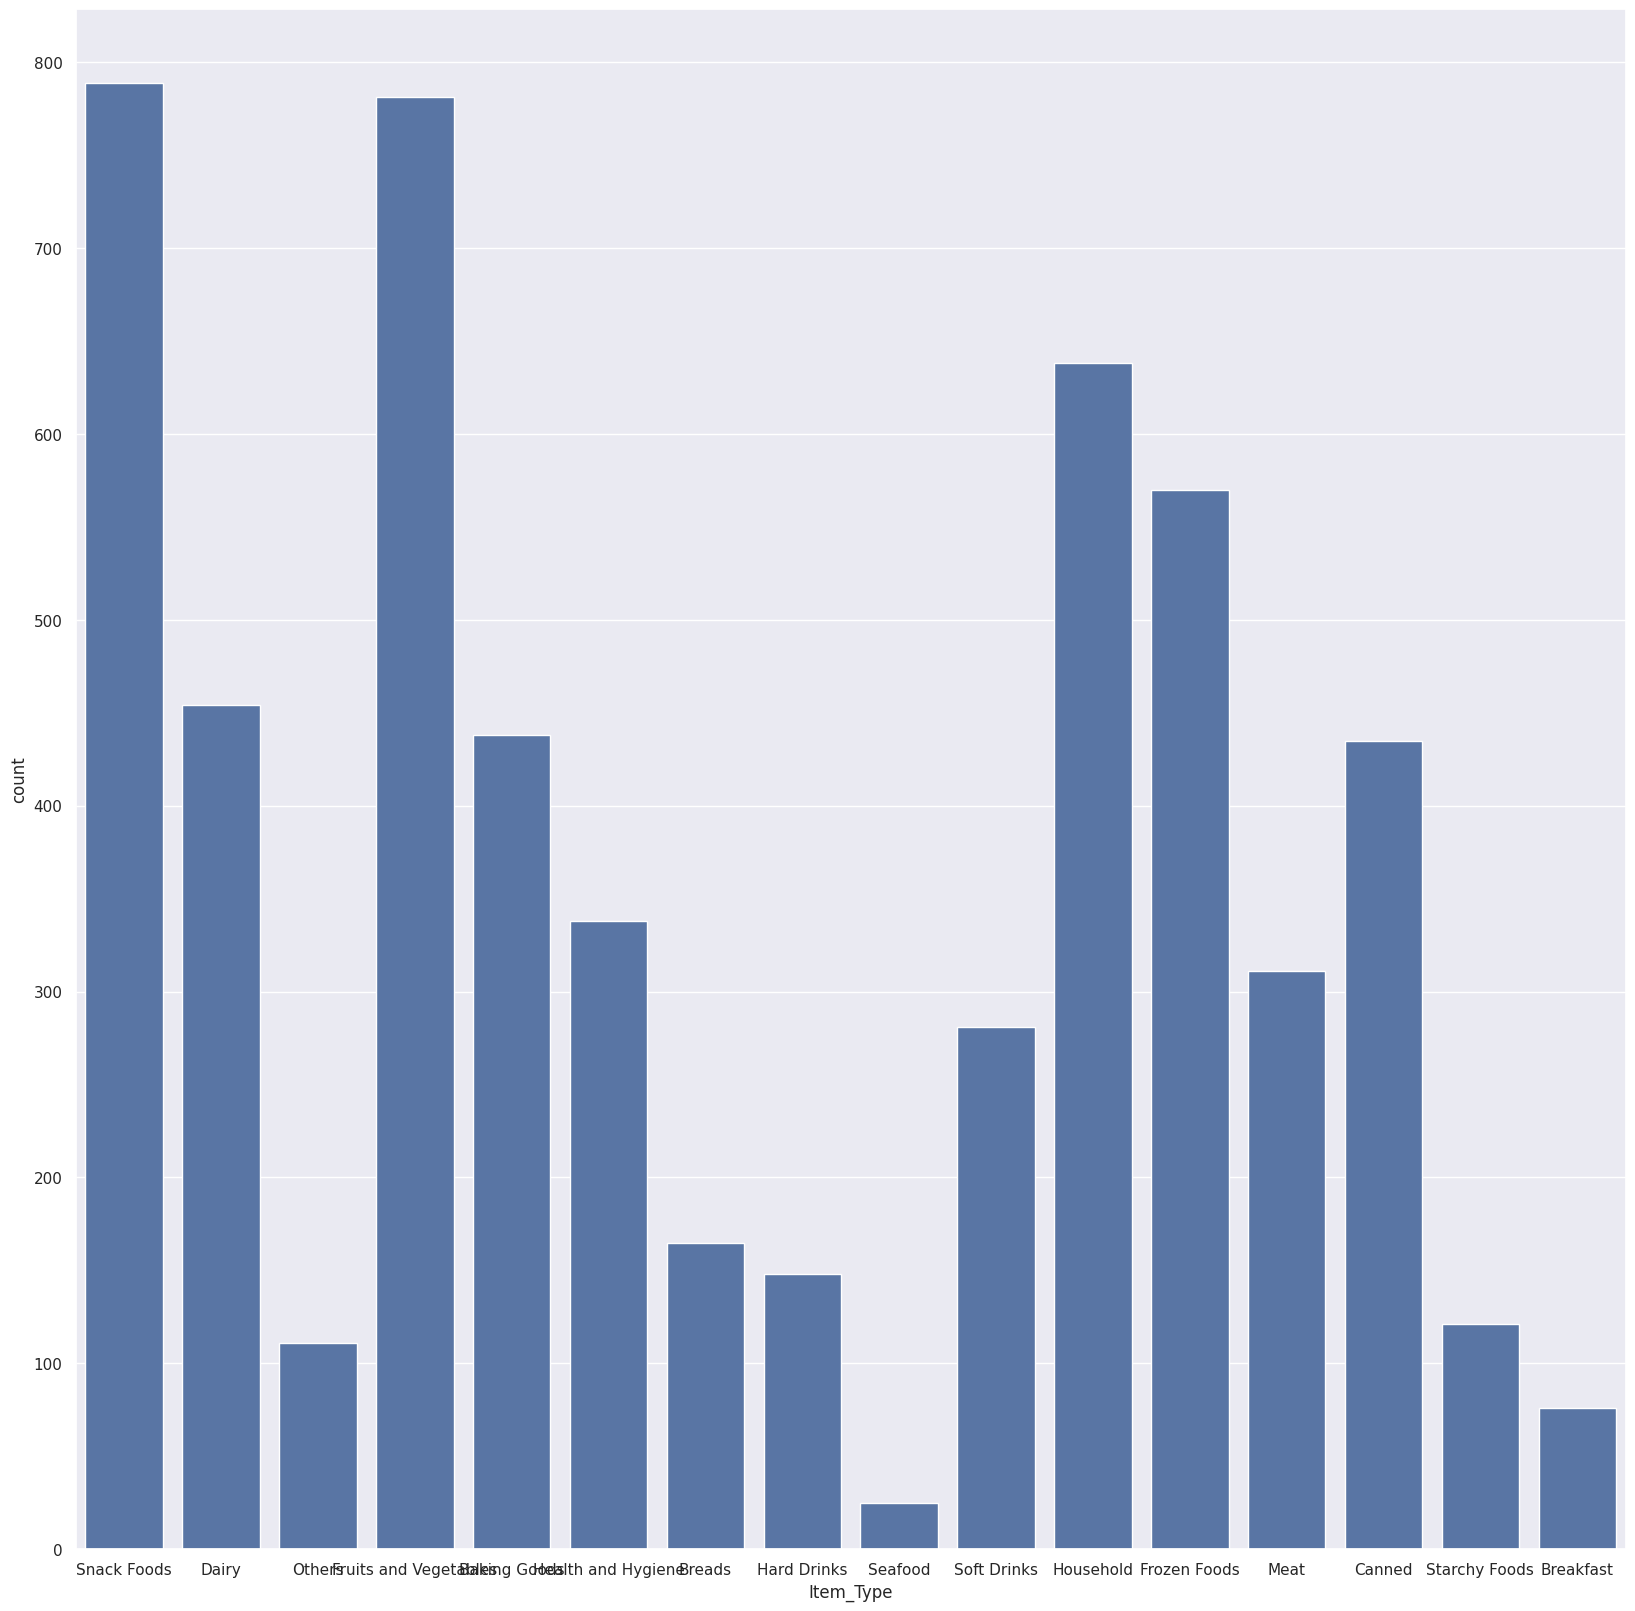

In [193]:
sns.set()
plt.figure(figsize=(20,20))
sns.countplot(x='Item_Type',data=test_data)
plt.show()

<ipython-input-194-5c078005913b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['Item_MRP'])


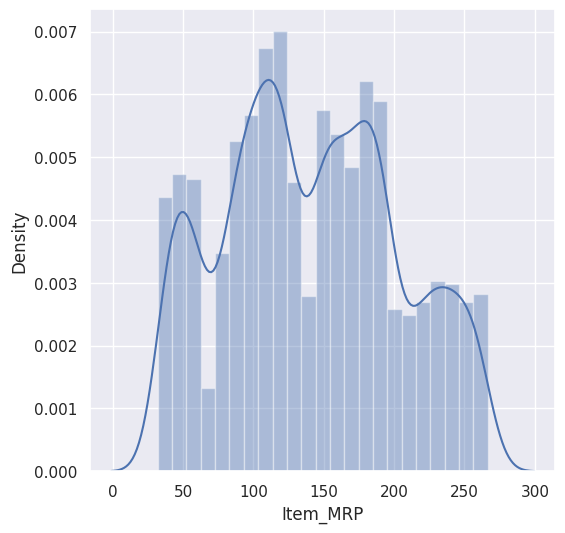

In [194]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(test_data['Item_MRP'])
plt.show()

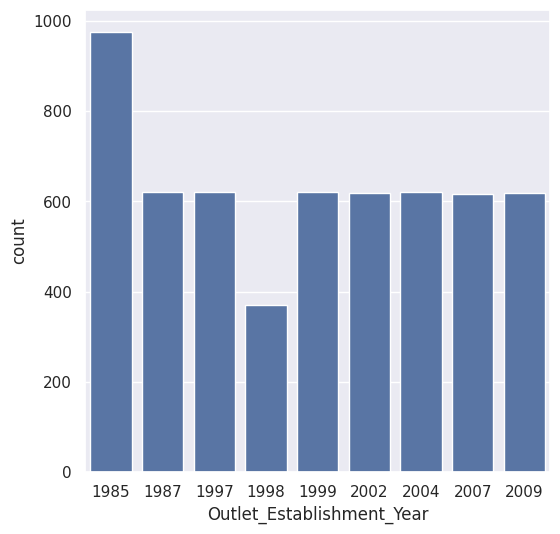

In [196]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=test_data)
plt.show()

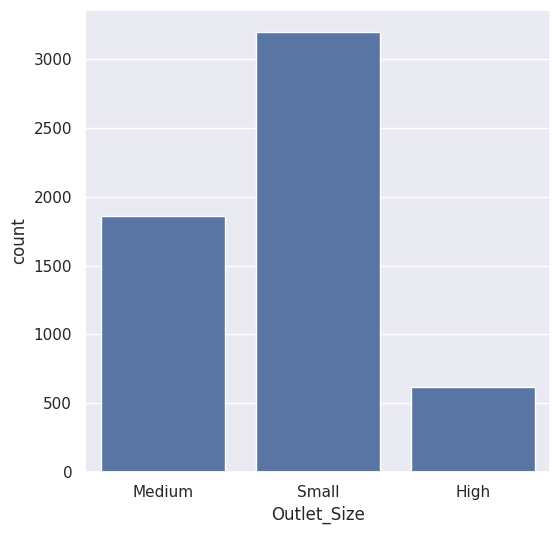

In [198]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=test_data)
plt.show()

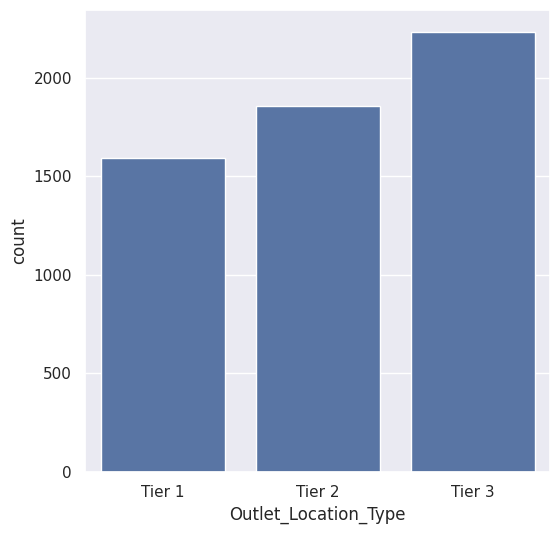

In [200]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=test_data)
plt.show()

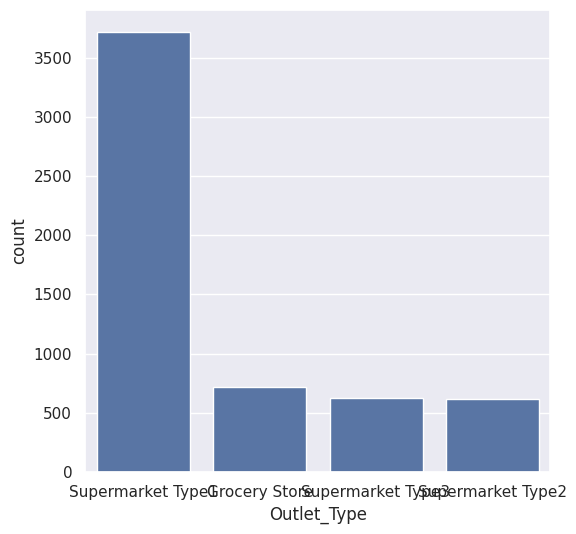

In [201]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data=test_data)
plt.show()

Enocder

In [203]:
test_encoder = LabelEncoder()

In [206]:
test_data.Item_Identifier = test_encoder.fit_transform(test_data['Item_Identifier'])
test_data.Item_Fat_Content = test_encoder.fit_transform(test_data['Item_Fat_Content'])
test_data.Item_Type = test_encoder.fit_transform(test_data['Item_Type'])
test_data.Outlet_Identifier = test_encoder.fit_transform(test_data['Outlet_Identifier'])
test_data.Outlet_Size = test_encoder.fit_transform(test_data['Outlet_Size'])
test_data.Outlet_Location_Type = test_encoder.fit_transform(test_data['Outlet_Location_Type'])
test_data.Outlet_Type = test_encoder.fit_transform(test_data['Outlet_Type'])

In [207]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,9.30,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,5.92,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,17.50,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,19.20,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,8.93,1,0.118599,4,234.2300,5,1985,1,2,3


Regressor

In [218]:
test_data_prediction = regressor.predict(test_data)
test_data_prediction = np.asarray(test_data_prediction)
test_data_prediction.reshape(-1,1)

array([[1230.7092],
       [1473.3412],
       [1014.9604],
       ...,
       [1783.6512],
       [4373.072 ],
       [1538.616 ]], dtype=float32)

In [219]:
print(test_data_prediction)

[1230.7092 1473.3412 1014.9604 ... 1783.6512 4373.072  1538.616 ]
